In [1]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd   
import numpy as np
# data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import confusion_matrix         # confusion matrix


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
import seaborn           as sns                      # enhanced data viz
import statsmodels.formula.api as smf                # logistic regression
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier# standard scaler  
import gender_guesser.detector as gender
import re
########################################
# loading data and setting display options
########################################
# reading the file into Python
got = pd.read_excel('./__datasets/GOT_character_predictions.xlsx')


# loading model performance
model_performance = pd.read_excel('./path_practice/__results/classification_model_performance.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# outputting the first ten rows of the dataset
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [2]:
got.info() #looking the data types of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null float64
isAliveHeir                   23 non-null f

In [3]:
got.shape  #dimensions of the dataset

(1946, 25)

In [4]:
got.isnull().sum()   # checking whether there is missing values in out features or not

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [5]:
#checking the columns
for columns in got:
    print(columns)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


In [6]:
# loop to search for missing values and validating that missing values were identified

for col in got:
    count_values_columns = got[col].value_counts(normalize = False,
                                    sort      = False,
                                    ascending = False).sort_index()
    print(count_values_columns)
    print('-'*90)

1       1
2       1
3       1
4       1
5       1
       ..
1942    1
1943    1
1944    1
1945    1
1946    1
Name: S.No, Length: 1946, dtype: int64
------------------------------------------------------------------------------------------
Abelar Hightower    1
Addam               1
Addam Frey          1
Addam Marbrand      1
Addam Osgrey        1
                   ..
Zekko               1
Zharaq zo Loraq     1
Zhoe Blanetree      1
Zia Frey            1
Zollo               1
Name: name, Length: 1946, dtype: int64
------------------------------------------------------------------------------------------
Acorn Hall                                                       2
Andals                                                           2
Arbor                                                            1
Archmaester                                                     21
Ashford                                                          2
Banefort                                             

Name: book1_A_Game_Of_Thrones, dtype: int64
------------------------------------------------------------------------------------------
0    1217
1     729
Name: book2_A_Clash_Of_Kings, dtype: int64
------------------------------------------------------------------------------------------
0    1011
1     935
Name: book3_A_Storm_Of_Swords, dtype: int64
------------------------------------------------------------------------------------------
0     794
1    1152
Name: book4_A_Feast_For_Crows, dtype: int64
------------------------------------------------------------------------------------------
0    1177
1     769
Name: book5_A_Dance_with_Dragons, dtype: int64
------------------------------------------------------------------------------------------
0.0     6
1.0    15
Name: isAliveMother, dtype: int64
------------------------------------------------------------------------------------------
0.0    21
1.0     5
Name: isAliveFather, dtype: int64
--------------------------------------------

In [7]:
# flag the missing values
for column in got:

    if got[column].isnull().astype(int).sum() > 0:
        got['m_' + column] = got[column].isnull().astype(int)

In [8]:
# sum of missing values
print(f"""
Sums of Missing Value Flags
--------------------------
{got.iloc[ : , -13: ].sum(axis = 0)}

""")


Sums of Missing Value Flags
--------------------------
m_title            1008
m_culture          1269
m_dateOfBirth      1513
m_mother           1925
m_father           1920
m_heir             1923
m_house             427
m_spouse           1670
m_isAliveMother    1925
m_isAliveFather    1920
m_isAliveHeir      1923
m_isAliveSpouse    1670
m_age              1513
dtype: int64




In [9]:
#Immuting missing variables
m_title = got['title'].fillna('title_unknown', inplace = True)
m_culture = got["culture"].fillna("culture_unknown", inplace = True) 
m_mother = got['mother'].fillna('mother_unknown', inplace = True)
m_father = got['father'].fillna('father_unknown', inplace = True)
m_heir = got['heir'].fillna('heir_unknown', inplace = True)
m_house = got['house'].fillna('house_unknown', inplace = True)
m_spouse = got['spouse'].fillna('spouse_unknown', inplace = True)
m_isAliveMother = got['isAliveMother'].fillna(-1, inplace = True)
m_isAliveFather = got['isAliveFather'].fillna(-1, inplace = True)
m_isAliveHeir = got['isAliveHeir'].fillna(-1, inplace = True)
m_isAliveSpouse = got['isAliveSpouse'].fillna(-1, inplace = True)

In [10]:
# missing values for date of birth
m_dateOfBirth  = got['dateOfBirth'].median()

# fill NA with mode
got['dateOfBirth'].fillna(value = int(m_dateOfBirth), #value for filling the NA
                            inplace = True) #replacing the Na

# missing values for date of birth
m_age  = got['age'].median()

# fill NA with mode
got['age'].fillna(value = int(m_age), #value for filling the NA
                            inplace = True) #replacing the Na

In [11]:
got['dobage'] = got['dateOfBirth'] + got['age']

In [12]:
g = gender.Detector(case_sensitive=False)
gender_guesser=[]
for item in got['name']:
    _gender=g.get_gender(re.findall(r'\S+', item)[0])
    gender_guesser.append(_gender)
#print(gender_guesser)
got["gender"]=gender_guesser
#check total gender counts
got["gender"].value_counts()

unknown          1384
male              381
female            125
mostly_male        24
mostly_female      21
andy               11
Name: gender, dtype: int64

In [13]:
#Grouping genders under 3 categories
got['gender'] = got['gender'].map(
                        {
                         'male'          :'male',
                         'female'        :'female',
                         'unknown'       :'unknown',
                         'mostly_male'   :'male',
                         'mostly_female' :'female',
                         'andy'          :'male'})

In [14]:
#Creating dummy variables
got = pd.get_dummies(data = got, columns = ['gender'], dtype = int)

In [15]:
#Grouping cultures based on region of origin
_culture = {
    'Essos': ['summer islands', 'summer islander', 'summer isles','ghiscari', 'ghiscaricari',  'ghis','braavosi', \
              'norvos', 'norvoshi','braavos','qartheen', 'qarth',"asshai'i", 'asshai','astapor', 'astapori','ibbenese'\
             ,'lhazareen', 'lhazarene','lhazarene','lysene', 'lyseni','meereen', 'meereenese','myr', 'myrish', \
              'myrmen','naathi','tyroshi','pentoshi','qohor','rhoynar','valyrian','dothraki'],
    'South': ['dornishmen', 'dorne', 'dornish','westermen', 'westerman', 'westerlands','westeros', 'westerosi'\
              ,'the reach', 'reach', 'reachmen','stormlands', 'stormlander','ironborn', 'ironmen','riverlands', \
              'rivermen','andal', 'andals','vale', 'valemen', 'vale mountain clans','summer islands', 'summer islander',\
              'summer isles','sistermen'],
    'North': ['the north', 'northmen','northern mountain clans',\
              'wildling', 'first men', 'free folk','crannogmen','wildlings']
      
}


def get_culture(value):
    value = value.lower()
    v = [k for (k, v) in _culture.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
    got.loc[:, "culture"] = [get_culture(x) for x in got["culture"]]

In [16]:
cult_d=[]

for item in got['culture']:
    i_culture= get_culture(item)
    if i_culture:
        cult_d.append(i_culture)
    else:
        cult_d.append(item)
#print(culture)
got["cult_d"]=cult_d
#check total gender counts
got["cult_d"].value_counts()

Culture_Unknown    1269
South               274
North               212
Essos               191
Name: cult_d, dtype: int64

In [17]:
got = pd.get_dummies(data = got, columns = ['cult_d'], dtype = int)

In [18]:
got.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house 

In [19]:
got.head(5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,dobage,gender_female,gender_male,gender_unknown,cult_d_Culture_Unknown,cult_d_Essos,cult_d_North,cult_d_South
0,1,Viserys II Targaryen,title_unknown,culture_unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,house_unknown,spouse_unknown,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,295.0,0,0,1,1,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,mother_unknown,father_unknown,heir_unknown,House Frey,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0,0,0,1,0,0,0,1
2,3,Addison Hill,Ser,culture_unknown,268.0,mother_unknown,father_unknown,heir_unknown,House Swyft,spouse_unknown,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,295.0,0,1,0,1,0,0,0
3,4,Aemma Arryn,Queen,culture_unknown,82.0,mother_unknown,father_unknown,heir_unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,105.0,0,0,1,1,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,mother_unknown,father_unknown,heir_unknown,House Santagar,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0,1,0,0,0,0,0,1


In [20]:
got.describe(include = "number")   #Descriptive analysis of our data

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,dobage,gender_female,gender_male,gender_unknown,cult_d_Culture_Unknown,cult_d_Essos,cult_d_North,cult_d_South
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,559.343782,0.198356,0.374615,0.480473,0.591984,0.395170,-0.981501,-0.984070,-0.980473,-0.747688,0.141829,0.460946,-266.835560,0.305755,0.089584,0.745632,0.517986,0.652107,0.777492,0.989209,0.986639,0.988181,0.219424,0.858171,0.989209,0.986639,0.988181,0.858171,0.777492,292.508222,0.075026,0.213772,0.711202,0.652107,0.098150,0.108941,0.140802
std,561.906131,9236.930558,0.398864,0.484148,0.499747,0.491593,0.489013,0.183278,0.144311,0.185957,0.640178,0.348965,0.498601,9236.701483,1.383910,0.160568,0.435617,0.499805,0.476424,0.416037,0.103346,0.114843,0.108099,0.413963,0.348965,0.103346,0.114843,0.108099,0.348965,0.416037,24.334667,0.263501,0.410073,0.453320,0.476424,0.297594,0.311646,0.347906
min,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,268.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,27.000000,0.000000,0.013378,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,295.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,973.500000,268.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,27.000000,0.000000,0.033445,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,295.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1459.750000,268.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,27.000000,0.000000,0.086957,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,295.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1946.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,305.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
got_corr = got.corr(method = 'pearson').round(decimals = 2)
got_corr

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,dobage,gender_female,gender_male,gender_unknown,cult_d_Culture_Unknown,cult_d_Essos,cult_d_North,cult_d_South
S.No,1.00,0.05,0.29,0.31,0.37,0.28,0.41,-0.08,-0.09,-0.11,0.15,0.15,0.24,-0.05,0.09,0.28,-0.13,-0.24,-0.07,-0.24,0.09,0.09,0.11,-0.27,-0.15,0.09,0.09,0.11,-0.15,-0.24,0.04,-0.05,-0.01,0.04,-0.07,-0.00,0.03,0.07
dateOfBirth,0.05,1.00,0.06,0.04,0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.03,-1.00,0.06,0.01,-0.05,0.03,-0.01,-0.06,0.00,0.00,0.00,-0.02,0.01,0.00,0.00,0.00,0.01,-0.06,0.01,-0.01,-0.02,0.02,-0.01,0.04,-0.01,-0.01
book1_A_Game_Of_Thrones,0.29,0.06,1.00,0.39,0.24,0.08,0.26,-0.05,-0.05,-0.05,0.09,0.09,0.10,-0.06,0.19,0.32,-0.15,-0.11,-0.12,-0.15,0.05,0.05,0.05,-0.11,-0.09,0.05,0.05,0.05,-0.09,-0.15,0.06,-0.01,-0.03,0.04,-0.12,0.00,0.08,0.09
book2_A_Clash_Of_Kings,0.31,0.04,0.39,1.00,0.45,0.18,0.23,-0.08,-0.08,-0.08,0.16,0.16,0.02,-0.04,0.08,0.25,-0.07,-0.01,-0.00,-0.26,0.08,0.08,0.08,-0.18,-0.16,0.08,0.08,0.08,-0.16,-0.26,0.15,0.00,-0.06,0.06,-0.00,-0.11,0.10,0.01
book3_A_Storm_Of_Swords,0.37,0.00,0.24,0.45,1.00,0.37,0.29,-0.10,-0.11,-0.10,0.15,0.15,0.02,-0.00,0.05,0.21,0.01,-0.01,0.09,-0.22,0.10,0.11,0.11,-0.17,-0.15,0.10,0.11,0.11,-0.15,-0.22,0.15,0.04,-0.04,0.01,0.09,-0.12,0.00,-0.03
book4_A_Feast_For_Crows,0.28,-0.00,0.08,0.18,0.37,1.00,0.34,-0.12,-0.13,-0.13,0.14,0.13,0.08,0.00,-0.01,0.12,0.27,-0.08,0.01,-0.16,0.13,0.14,0.13,-0.16,-0.13,0.13,0.14,0.13,-0.13,-0.16,0.19,0.04,0.02,-0.04,0.01,-0.10,-0.06,0.11
book5_A_Dance_with_Dragons,0.41,0.01,0.26,0.23,0.29,0.34,1.00,-0.08,-0.09,-0.08,0.11,0.10,0.10,-0.01,0.10,0.22,0.03,-0.10,-0.18,-0.17,0.08,0.09,0.09,-0.17,-0.10,0.08,0.09,0.09,-0.10,-0.17,0.11,0.03,-0.01,-0.01,-0.18,0.03,0.14,0.10
isAliveMother,-0.08,-0.00,-0.05,-0.08,-0.10,-0.12,-0.08,1.00,0.81,0.68,-0.04,-0.04,-0.09,0.00,0.39,0.39,-0.14,0.10,0.05,0.05,-0.97,-0.87,-0.77,0.19,0.04,-0.97,-0.87,-0.77,0.04,0.05,0.01,-0.01,-0.03,0.03,0.05,-0.01,-0.04,-0.02
isAliveFather,-0.09,-0.00,-0.05,-0.08,-0.11,-0.13,-0.09,0.81,1.00,0.77,-0.04,-0.04,-0.10,0.00,0.33,0.37,-0.12,0.11,0.04,0.06,-0.82,-0.95,-0.78,0.21,0.04,-0.82,-0.95,-0.78,0.04,0.06,0.01,-0.02,-0.02,0.03,0.04,-0.02,-0.03,-0.01
isAliveHeir,-0.11,-0.00,-0.05,-0.08,-0.10,-0.13,-0.08,0.68,0.77,1.00,-0.04,-0.04,-0.10,0.00,0.35,0.38,-0.12,0.10,0.06,0.06,-0.76,-0.78,-0.96,0.20,0.04,-0.76,-0.78,-0.96,0.04,0.06,0.01,-0.03,-0.03,0.04,0.06,-0.03,-0.02,-0.04


In [22]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 46 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         1946 non-null object
culture                       1946 non-null object
dateOfBirth                   1946 non-null float64
mother                        1946 non-null object
father                        1946 non-null object
heir                          1946 non-null object
house                         1946 non-null object
spouse                        1946 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 1946 non-null float64
isAliveFather                 1946 non-null float64
isAliveHeir                  

In [23]:
got['title'].value_counts(normalize=False, sort=True, ascending=False)

title_unknown                                                  1008
Ser                                                             384
Maester                                                          39
Archmaester                                                      21
Lord                                                             20
Septon                                                           18
Winterfell                                                       17
Princess                                                         16
Lady                                                             12
Septa                                                            10
Lord Commander of the Night's Watch                               9
King in the North                                                 9
Prince                                                            9
Grand Maester                                                     8
Cupbearer                                       

In [24]:
got['title'].value_counts(normalize=False, sort=True, ascending=False).sort_index()

Acorn Hall                                                        2
Andals                                                            2
Arbor                                                             1
Archmaester                                                      21
Ashford                                                           2
Banefort                                                          1
Barrowton                                                         2
Bear Island                                                       1
Big BucketThe Wull                                                1
Bitterbridge                                                      3
Black Wind                                                        1
Blackcrown                                                        2
Blackmont                                                         1
Blacktyde                                                         1
Bloodrider                                      

In [25]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

Correlation analysis

In [26]:
got_corr = got.corr().round(2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
dobage                        0.31
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_mother                      0.14
m_isAliveMother               0.14
m_isAliveFather               0.14
m_father                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_isAliveSpouse               0.05
gender_female                 0.05
m_spouse                      0.05
age                           0.05
m_title                       0.04
cult_d_South                  0.04
m_culture                     0.04
m_house                       0.04
cult_d_Culture_Unknown        0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
gender_male                  -0.00
gender_unknown               -0.03
isAliveSpouse                -0.03
cult_d_North                 -0.03
isNoble                      -0.04
dateOfBirth                  -0.05
isMarried           

In [27]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [28]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [29]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



Logistic Regression

In [31]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows""",
                           data    = got_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-08 19:36  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [32]:
for val in got_data:
    print(f" '{val}',")

 'S.No',
 'name',
 'title',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'm_title',
 'm_culture',
 'm_dateOfBirth',
 'm_mother',
 'm_father',
 'm_heir',
 'm_house',
 'm_spouse',
 'm_isAliveMother',
 'm_isAliveFather',
 'm_isAliveHeir',
 'm_isAliveSpouse',
 'm_age',
 'dobage',
 'gender_female',
 'gender_male',
 'gender_unknown',
 'cult_d_Culture_Unknown',
 'cult_d_Essos',
 'cult_d_North',
 'cult_d_South',


In [33]:
for val in got_data:
    print(f" {val} +")

 S.No +
 name +
 title +
 culture +
 dateOfBirth +
 mother +
 father +
 heir +
 house +
 spouse +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 book5_A_Dance_with_Dragons +
 isAliveMother +
 isAliveFather +
 isAliveHeir +
 isAliveSpouse +
 isMarried +
 isNoble +
 age +
 numDeadRelations +
 popularity +
 m_title +
 m_culture +
 m_dateOfBirth +
 m_mother +
 m_father +
 m_heir +
 m_house +
 m_spouse +
 m_isAliveMother +
 m_isAliveFather +
 m_isAliveHeir +
 m_isAliveSpouse +
 m_age +
 dobage +
 gender_female +
 gender_male +
 gender_unknown +
 cult_d_Culture_Unknown +
 cult_d_Essos +
 cult_d_North +
 cult_d_South +


In [34]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~  
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 popularity +
 m_house +
 m_isAliveMother +
 dobage""",
                                         data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.434602
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.233     
Dependent Variable:    isAlive             AIC:                 1539.9756 
Date:                  2021-12-08 19:36    BIC:                 1589.1871 
No. Observations:      1751                Log-Likelihood:      -760.99   
Df Model:              8                   LL-Null:             -992.53   
Df Residuals:          1742                LLR p-value:         5.7830e-95
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -60.8903   7.7097 -7.8979 0.0000 -76.0011 -45.7796
book1_A_Game_Of_Thrones  -0.6572   0.1618 -4.0613 0.0000  -0.9744  -0.3401
book2_A_Clash_Of_Kings   -0.6322   0.1462 -4.3236 0.0000  -0.9188  -0.3456
book3_A_Storm_Of_Swords  -0.5056   0.1522 -3.3216 0.0009  -0.8039  -0.2073
book4_A_Feast_For_Crows   1.3904   0.1522  9.1373 0.0000   1.0922   1.6887
popularity               -2.1908   0.4652 -4.7093 0.0000  -3.1026  -1.2790
m_house                   0.3456   0.1638  2.1091 0.0349   0.0244   0.6667
m_isAliveMother           1.6667   0.7234  2.3039 0.0212   0.2488   3.0846
dobage                    0.2046   0.0264  7.7469 0.0000   0.1528   0.2563
==========================================================================

"""

Explanatory sets from last session

Creating a dictionary to store candidate models

In [35]:
candidate_dict = {

 # full model
 'logit_full'   : [ 'S.No','name','title','culture','dateOfBirth','mother',
                   'father', 'heir', 'house', 'spouse', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
                   'book5_A_Dance_with_Dragons','isAliveMother','isAliveFather', 
                   'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble','age',
                   'numDeadRelations','popularity','m_title','m_culture','m_dateOfBirth',
                   'm_mother','m_father', 'm_heir', 'm_house', 'm_spouse',
                   'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir',
                   'm_isAliveSpouse','m_age'],
 

 # significant variables only (set 1)
 'logit_sig'    : [ 'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book4_A_Feast_For_Crows',
                   'popularity', 'm_house','dobage'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book4_A_Feast_For_Crows', 'book3_A_Storm_Of_Swords',
                   'isAliveMother',  'm_house',
                   'popularity', 'dobage'],
 
 # significant variables only (set 3)
 'logit_sig_3'  : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book4_A_Feast_For_Crows','popularity', 
                   'dobage', 'numDeadRelations']    
}

In [36]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age']


First Significant p-value Model:
--------------------------------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'dobage']




In [37]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig_2']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219,
                           warm_start = False)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7778
LogReg Testing  ACCURACY: 0.8359
LogReg Train-Test Gap   : 0.0581


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


RandomizedSearchCV

In [38]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_range          = np.arange(0.1, 5.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_range,
#              'warm_start' : warm_start_range,
#              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                 cv                  = 3,          # how many folds in cross-validation
#                                 n_iter              = 250,        # number of combinations of hyperparameters to try
#                                 random_state        = 219,        # starting point for random sequence
#                                 scoring = make_scorer(
#                                           roc_auc_score,
#                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
Tuned CV AUC      : 0.6185

In [39]:
# checking the results of RandomizedSearch CV
#lr_tuned_cv.cv_results_

In [40]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_

In [41]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.4000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.8121
LR Tuned Testing  ACCURACY: 0.8513
LR Tuned AUC Score        : 0.7231


In [42]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 21  29]
 [  3 142]]


In [43]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 3
True Positives : 142



In [44]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6997


Classification Trees (CART Models)

In [45]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [46]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9103
Full Tree Testing ACCURACY : 0.8462
Full Tree AUC Score: 0.8114


In [47]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 17
True Positives : 128



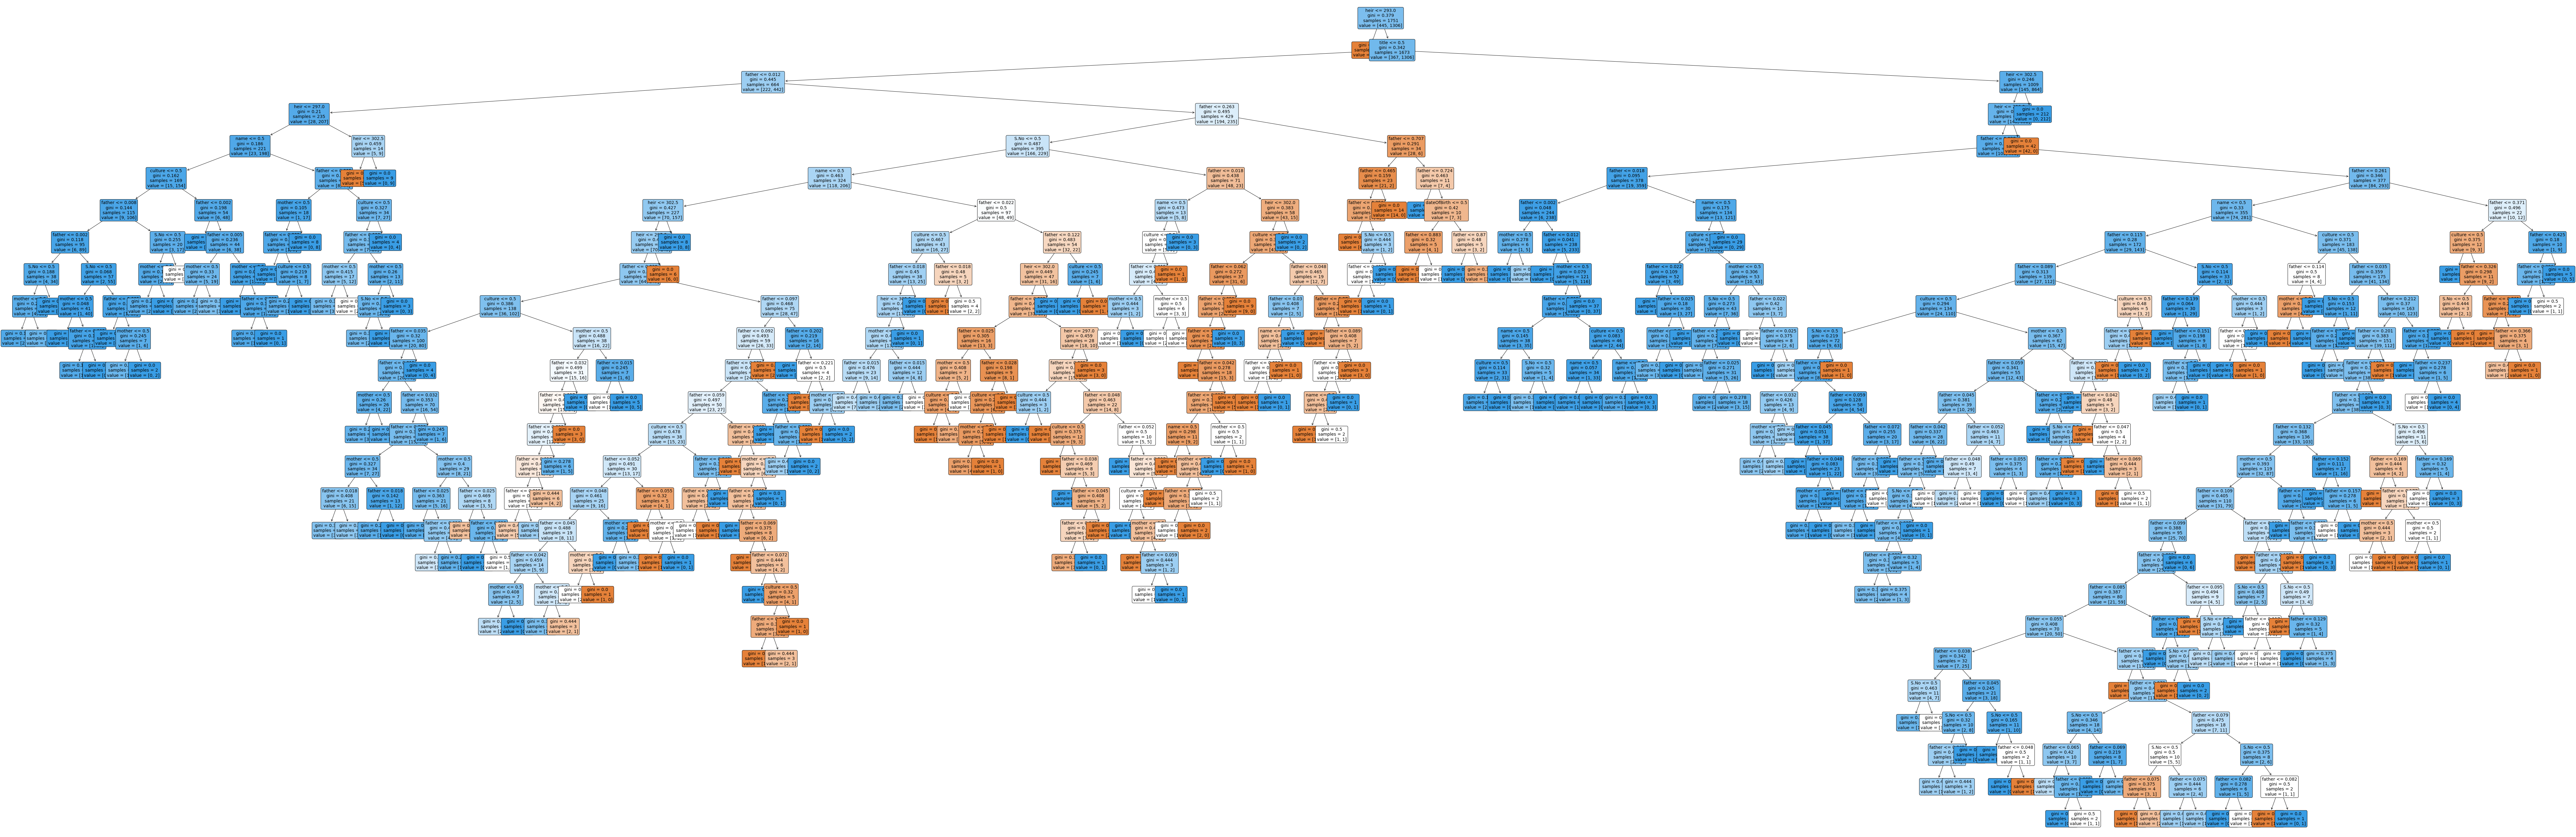

In [48]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [49]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.827
Testing  ACCURACY: 0.8513
AUC Score        : 0.71


In [50]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")



True Negatives : 21
False Positives: 29
False Negatives: 0
True Positives : 145



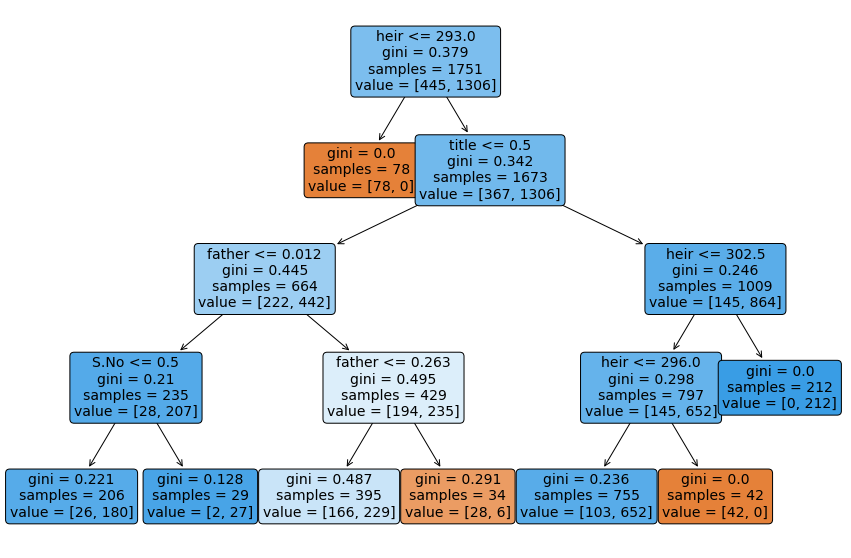

In [51]:
# setting figure size
plt.figure(figsize=(15, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

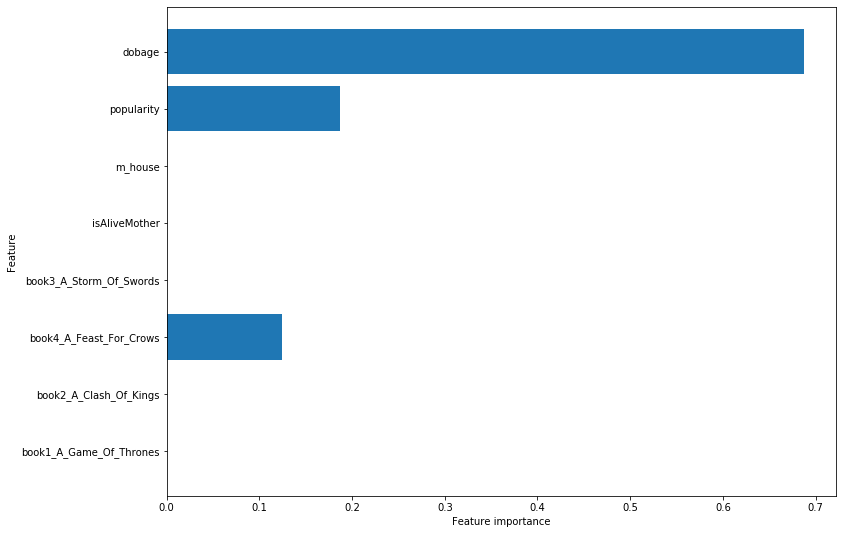

In [52]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [53]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__datasets/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6997         (21, 29, 3, 142)
Full Tree     0.8114           (37, 13, 17, 128)
Pruned Tree   0.71         (21, 29, 0, 145)



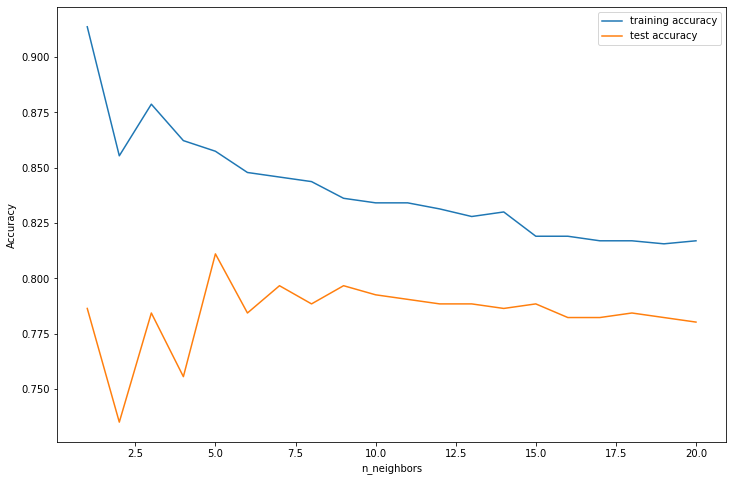

The optimal number of neighbors is: 5


In [54]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [55]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8515
Testing  ACCURACY: 0.8205
AUC Score        : 0.7417


In [56]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 0
True Positives : 145



Random Forest

In [78]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 350,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = True,
                                    random_state     = 219)

In [58]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [59]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8429
Testing  ACCURACY: 0.8974
AUC Score        : 0.8066


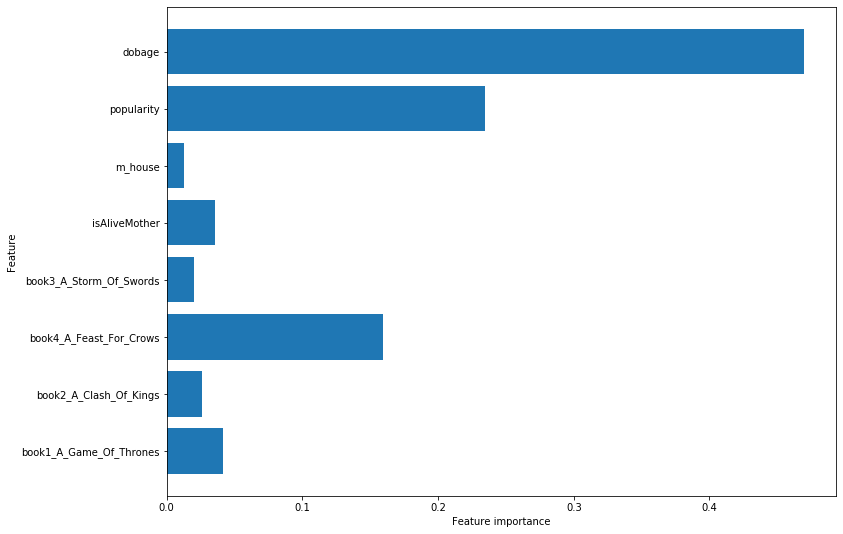

In [60]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [61]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 1
True Positives : 144



In [62]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6997,0.7778,0.8359,"(21, 29, 3, 142)"
1,Full Tree,0.8114,0.9103,0.8462,"(37, 13, 17, 128)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.8066,0.8429,0.8974,"(31, 19, 1, 144)"


In [63]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)
#leaf_range       = np.arange(1, 31, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
#              'min_samples_leaf' : leaf_range,
#              'criterion'        : criterion_range,
#             'bootstrap'        : bootstrap_range,
#             'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                              scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.6445

In [64]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 2,
                                      n_estimators     = 600,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8949
Forest Tuned Testing  ACCURACY: 0.9333
Forest Tuned AUC Score        : 0.8962


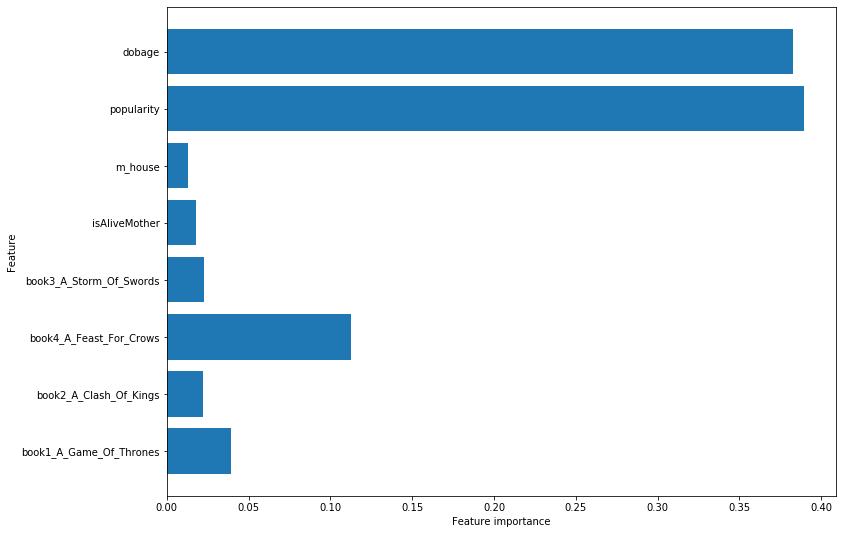

In [65]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [66]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 41
False Positives: 9
False Negatives: 4
True Positives : 141



Gradient Boosted Machines

In [77]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.9103
Testing ACCURACY : 0.8769
AUC Score        : 0.8321


In [68]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 4
True Positives : 141



In [69]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6997,0.7778,0.8359,"(21, 29, 3, 142)"
1,Full Tree,0.8114,0.9103,0.8462,"(37, 13, 17, 128)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.8066,0.8429,0.8974,"(31, 19, 1, 144)"
4,GBM (Full),0.8062,0.8538,0.8872,"(32, 18, 4, 141)"


In [70]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.1)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(1, 8, 0.1)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
 #             'max_depth'     : depth_range,
  #           'n_estimators'  : estimator_range,
   #           'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
 #                          param_distributions = param_grid,
  #                         cv                  = 3,
   #                        n_iter              = 500,
    #                       random_state        = 219,
     #                      n_jobs = -1,
      #                     scoring             = make_scorer(roc_auc_score,
       #                                          needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 350, 'max_depth': 2.6000000000000014, 'learning_rate': 1.1}
Tuned Training AUC: 0.7574

In [71]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

In [76]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(loss = "deviance",
                                       learning_rate = 1.1,
                                       max_depth     = 8,
                                       n_estimators  = 350,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9081
Testing  ACCURACY: 0.9385
AUC Score        : 0.8997


In [73]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 40
False Positives: 10
False Negatives: 4
True Positives : 141



In [74]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6997,0.7778,0.8359,"(21, 29, 3, 142)"
1,Full Tree,0.8114,0.9103,0.8462,"(37, 13, 17, 128)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.8066,0.8429,0.8974,"(31, 19, 1, 144)"
4,GBM (Full),0.8062,0.8538,0.8872,"(32, 18, 4, 141)"
5,Tuned GBM,0.8862,0.8732,0.9282,"(40, 10, 4, 141)"


In [75]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : '***Tuned Random Forest (Selected model)***',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6997,0.7778,0.8359,"(21, 29, 3, 142)"
1,Full Tree,0.8114,0.9103,0.8462,"(37, 13, 17, 128)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.8066,0.8429,0.8974,"(31, 19, 1, 144)"
4,GBM (Full),0.8062,0.8538,0.8872,"(32, 18, 4, 141)"
5,Tuned GBM,0.8862,0.8732,0.9282,"(40, 10, 4, 141)"
6,***Tuned Random Forest (Selected model)***,0.8962,0.8949,0.9333,"(41, 9, 4, 141)"
